In [1]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [10]:
# import metrics and split tool
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# classifier algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

# import datasets
from sklearn.datasets import load_digits
from sklearn.datasets import load_wine
from sklearn.datasets import load_breast_cancer

In [11]:
# dictionary of datasets
datasets = {'digits':load_digits(return_X_y=True),
            'wine':load_wine(return_X_y=True),
            'cancer':load_breast_cancer(return_X_y=True)}

# 회고

베이스가 된 프로젝트 파일명:'DA04_project_6-4_modelEvaluation_20250123' 

다음 내용은 load_wine 데이터셋의 feature 분석과정을 포함한다.


In [12]:
# load_digits 데이터는 이미지라서 feature 비교에는 부적합한 듯해 스킵함

# datasets['digits'][0].shape 
# # [0] = X, [1] = y 
# # image is 8x8 

In [13]:
# check the datasets data, target and feature
load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [14]:
wine_data = load_wine()

In [15]:
# switch the data into Data Frame format and added a label column to the table.
wine_df = pd.DataFrame(wine_data['data'],columns = wine_data['feature_names'])
wine_df['label']= wine_data['target']

print(wine_df)

     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [16]:
# preparation to get statistic results in dictionary
wine_means_stat = {} # avg
wine_sigma_stat = {} # std

# group the dataset by the values of 'label' column
# expected results: 3 groups(0,1,2) 
# calculate the standard deviation and average of grouped datasets
for (label, group) in wine_df.groupby('label'):
    wine_sigma_stat[label]=group.std()
    wine_means_stat[label]=group.mean()

# make it readable    
wine_means_df = pd.DataFrame(wine_means_stat)
wine_sigma_df = pd.DataFrame(wine_sigma_stat)

# see comparisons
print(wine_means_df)
print('-'*70)
print(wine_sigma_df)

                                        0           1           2
alcohol                         13.744746   12.278732   13.153750
malic_acid                       2.010678    1.932676    3.333750
ash                              2.455593    2.244789    2.437083
alcalinity_of_ash               17.037288   20.238028   21.416667
magnesium                      106.338983   94.549296   99.312500
total_phenols                    2.840169    2.258873    1.678750
flavanoids                       2.982373    2.080845    0.781458
nonflavanoid_phenols             0.290000    0.363662    0.447500
proanthocyanins                  1.899322    1.630282    1.153542
color_intensity                  5.528305    3.086620    7.396250
hue                              1.062034    1.056282    0.682708
od280/od315_of_diluted_wines     3.157797    2.785352    1.683542
proline                       1115.711864  519.507042  629.895833
label                            0.000000    1.000000    2.000000
----------

# Evaluation
Top results: mean
Bottom results: standard deviation

mean value seems to be interesting:  
1. proline 이 눈에 확 띈다. 다른 feature 들에 비해 수치가 높고, 0번 라벨의 값이 특히 높다. 
2. hue's label 2 has significantly lower value than other labels
3. color_intensity 의 각 라벨값이 큰 격차가 없어보이거나 균등하게 차이가 나는 것 같다. 

우선 3번 라벨에 대한 가정이 맞는지 확인해보기로 한다.
무엇을 기준으로 차이가 크다, 작다를 판별할 수 있는지 기준을 찾고자 하는 것이다.

표준편차와 평균값의 상관관계를 비교했을 때 2번 라벨의 표준편차가 완만하고 넓게 퍼져 다른 라벨과 겹치지 않을까 생각됨. 그래서 color_intensity 로는 각 라벨 간의 분류 작업이 어려울 것이다. 

시각화의 도움을 받기로 한다. ↓


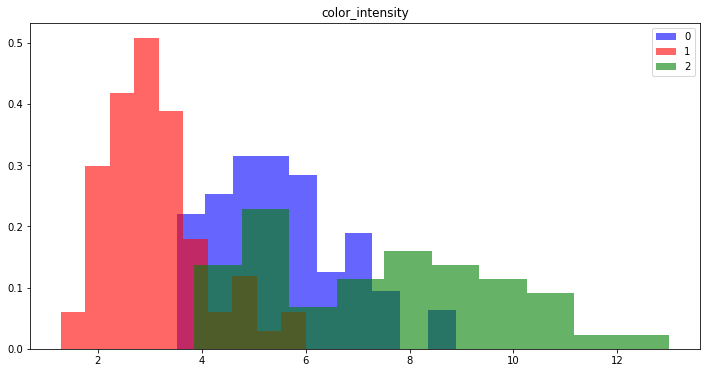

In [17]:
# visualization of label 0
fig,ax = plt.subplots(figsize=(12,6))
ax.set_title('color_intensity')

ax.hist(wine_df[wine_df.label==0]['color_intensity'], bins=10, density=True, alpha=0.6, color='blue',label=0)

# visualization of label 1
ax.hist(wine_df[wine_df.label==1]['color_intensity'], bins=10, density=True, alpha=0.6, color='red',label=1)

# visualization of label 2
ax.hist(wine_df[wine_df.label==2]['color_intensity'], bins=10, density=True, alpha=0.6, color='green',label=2)
ax.legend()


In [18]:
# 걍 테스트
# for plapla in wine_df.groupby('label'):
#     print(len(plapla)) 

# groupby always returns tuples
# groupby returns an iterable 

결론: 예상대로 2번값이 넓게 퍼져 0번클래스(라벨)과 1번클래스와 겹친다. 
color_intensity 값으로 각 클래스 구분이 어려울 것이 예상되므로 다른 feature를 기준점으로 삼는 것이 좋겠다. 

예상: 주제로서는 alchol, 수치값 비교로는 proline 이나 magnesium 이 테스트 소재로 유용하지 않을까 관심이 감.